In [33]:
# !pip install pandas
# !pip install -U scikit-learn==1.3.2
# !pip install umap-learn
# !pip install pacmap

In [1]:
import os
import pandas as pd
os.getcwd()

'/home/cristiano/ufpr/tcc'

In [32]:
!pip list | grep pacmap

pacmap            0.7.2


In [2]:
!pip list | grep pandas

pandas            2.2.1


In [4]:
!pip list | grep umap

umap-learn        0.5.5


In [4]:
# run on colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
base_path = '/home/cristiano/ufpr/tcc/data/'

In [6]:
df_microdados = pd.read_csv(f'{base_path}/MICRODADOS_ENEM_2022.csv', sep=';', encoding='ISO-8859-1')
# df_itens_prova = pd.read_csv(f'{base_path}/ITENS_PROVA_2022.csv', sep=';', encoding='ISO-8859-1')
# df_quest_hab = pd.read_csv(f'{base_path}/QUEST_HAB_ESTUDO.csv', sep=';', encoding='ISO-8859-1')

In [6]:
# df_microdados = df_microdados_original.copy()

In [7]:
df_microdados.shape

(3476105, 76)

In [8]:
import pandas as pd

# cntagem de valores nulos por coluna
valores_nulos_por_coluna = df_microdados.isnull().sum()

# Filtrar apenas as colunas com valores nulos
colunas_com_valores_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna > 0]

# Exibindo os resultados
print(colunas_com_valores_nulos)

TP_ENSINO                 2213361
CO_MUNICIPIO_ESC          2524161
NO_MUNICIPIO_ESC          2524161
CO_UF_ESC                 2524161
SG_UF_ESC                 2524161
TP_DEPENDENCIA_ADM_ESC    2524161
TP_LOCALIZACAO_ESC        2524161
TP_SIT_FUNC_ESC           2524161
CO_PROVA_CN               1120710
CO_PROVA_CH                982663
CO_PROVA_LC                982663
CO_PROVA_MT               1120710
NU_NOTA_CN                1120710
NU_NOTA_CH                 982663
NU_NOTA_LC                 982663
NU_NOTA_MT                1120710
TX_RESPOSTAS_CN           1120710
TX_RESPOSTAS_CH            982663
TX_RESPOSTAS_LC            982663
TX_RESPOSTAS_MT           1120710
TX_GABARITO_CN            1120710
TX_GABARITO_CH             982663
TX_GABARITO_LC             982663
TX_GABARITO_MT            1120710
TP_STATUS_REDACAO          982663
NU_NOTA_COMP1              982663
NU_NOTA_COMP2              982663
NU_NOTA_COMP3              982663
NU_NOTA_COMP4              982663
NU_NOTA_COMP5 

In [9]:
df_microdados.head(2)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B


In [10]:
# print(f'dimensão microdados: {df_microdados.shape}\ndimensão itens prova{df_itens_prova.shape}\ndimensão quest hab {df_quest_hab.shape}')

In [10]:
df_microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

Colunas
- NU_INSCRICAO: id
- NU_ANO -> remover
- TP_FAIXA_ETARIA: faixa etária(1 a 20)
- TP_SEXO -> M OU F
- TP_ESTADO_CIVIL: 0 A 4
- TP_COR_RACA: 0 A 6
- TP_NACIONALIDADE: 0 A 4
- TP_ST_CONCLUSAO: status conclusão ensino medio(1 a 4)
- TP_ANO_CONCLUIU: 0 A 16
- TP_ESCOLA: 1 a 3(possível target)
- TP_ENSINO: 1 OU 2
- IN_TREINEIRO: 1 OU 0
- CO_MUNICIPIO_ESC: codigo municipio escola
- NO_MUNICIPIO_ESC: Nome
- CO_UF_ESC: codigo da unidade da federação da escola
- SG_UF_ESC: sigla uf da escola
- TP_DEPENDENCIA_ADM_ESCOLA: 1 a 4
- TP_LOCALIZACAO_ESC: 1 ou 2(urbana ou rural)
- TP_SIT_FUNC_ESC: situacao de funcionamento(1 a 4)
- CO_MUNICIPIO_PROVA: código da cidade onde a prova foi aplicada
- NO_MUNICIPIO_PROVA: nome
- CO_UF_PROVA: codigo uf
- SG_UF_PROVA: sigla da uf
- TP_PRESENCA_CN
- TP_PRESENCA_CH
- TP_PRESENCA_LC
- TP_PRESENCA_MT: 0 A 2
- CO_PROVA_CN
- CO_PROVA_CH
- CO_PROVA_LC
- CO_PROVA_MT: código das provas(já é numérico)
- NU_NOTA_CN
- NU_NOTA_CH
- NU_NOTA_LC
- NU_NOTA_MT: notas(númerica)  
- TX_RESPOSTAS_CN
- TX_RESPOSTAS_CH
- TX_RESPOSTAS_LC
- TX_RESPOSTAS_MT: vetores com as respostas(não usar)

- TP_LINGUA: ingles ou espanhol(0 ou 1)

- TX_GABARITO_CN
- TX_GABARITO_CH
- TX_GABARITO_LC
- TX_GABARITO_MT: vetores com o gabarito(não usar)

- TP_STATUS_REDACAO: status redação(1 a 9)

- NU_NOTA_COMP1
- NU_NOTA_COMP2
- NU_NOTA_COMP3
- NU_NOTA_COMP4
- NU_NOTA_COMP5: notas de competências da redação

- NU_NOTA_REDACAO: nota redaçao

- questões socieconômicas: alternativas alfanuméricas
##### target inicial -> Q006

In [11]:
df_microdados.shape

(3476105, 76)

In [12]:
descartar = [
    'NU_INSCRICAO', 
    'NU_ANO', 
    'TX_RESPOSTAS_CN', 
    'TX_RESPOSTAS_CH', 
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TX_GABARITO_CN', 
    'TX_GABARITO_CH',
    'TX_GABARITO_LC', 
    'TX_GABARITO_MT', 
    'TP_ENSINO',              
    'CO_MUNICIPIO_ESC',       
    'NO_MUNICIPIO_ESC',       
    'CO_UF_ESC',              
    'SG_UF_ESC',              
    'TP_DEPENDENCIA_ADM_ESC', 
    'TP_LOCALIZACAO_ESC',     
    'TP_SIT_FUNC_ESC',        
    'CO_PROVA_CN',            
    'CO_PROVA_CH',            
    'CO_PROVA_LC',            
    'CO_PROVA_MT'
]


In [13]:
zerar_colunas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "TP_STATUS_REDACAO"]

In [14]:
df_microdados = df_microdados.drop(columns=descartar)

In [15]:
df_microdados[zerar_colunas] = df_microdados[zerar_colunas].fillna(0)

In [19]:
# df_exlui = df_microdados.dropna()
# df_microdados.shape[0] == df_exlui.shape[0]

In [20]:
# proporção de dados que contém algum dado nulo (ANTIGO)
# 681900 / 3476105

In [16]:
df_microdados.shape

(3476105, 54)

In [17]:
df_microdados.reset_index(drop=True, inplace=True)

In [18]:
df_microdados.rename(columns={'Q006': 'faixa_renda_familiar'}, inplace=True)

In [19]:
# !pip install pyarrow

In [20]:
df_microdados.to_parquet('./data/data_prepared_enem_2022.parquet')

#### UTILZAR DADOS JÁ PREPARADOS

In [4]:
df_microdados = pd.read_parquet('./data/data_prepared_enem_2022.parquet')

In [5]:
from sklearn.model_selection import train_test_split

X = df_microdados.drop('faixa_renda_familiar', axis=1)
y = df_microdados['faixa_renda_familiar']

In [6]:
# X.columns.to_list()

In [7]:
del df_microdados

In [8]:
numeric_cols = [
    "TP_FAIXA_ETARIA",
    "TP_ESTADO_CIVIL",
    "TP_COR_RACA",
    "TP_NACIONALIDADE",
    "TP_ST_CONCLUSAO",
    "TP_ANO_CONCLUIU",
    "TP_ESCOLA",
    "IN_TREINEIRO",
    "CO_MUNICIPIO_PROVA",
    "CO_UF_PROVA",
    "TP_PRESENCA_CN",
    "TP_PRESENCA_CH",
    "TP_PRESENCA_LC",
    "TP_PRESENCA_MT",
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "TP_LINGUA",
    "NU_NOTA_REDACAO",
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    "Q005"
]

categorical_cols = [
    "TP_SEXO",
    "Q001",
    "Q002",
    "Q003",
    "Q004",
    "Q007",
    "Q008",
    "Q009",
    "Q010",
    "Q011",
    "Q012",
    "Q013",
    "Q014",
    "Q015",
    "Q016",
    "Q017",
    "Q018",
    "Q019",
    "Q020",
    "Q021",
    "Q022",
    "Q023",
    "Q024",
    "Q025",
    "NO_MUNICIPIO_PROVA",
    "TP_STATUS_REDACAO",
    "SG_UF_PROVA"
]


In [9]:
len(numeric_cols + categorical_cols)

53

In [10]:
set(list(X.columns)) - set(numeric_cols + categorical_cols)

set()

In [11]:
# all_columns = X.columns.to_list()

In [12]:
X.shape

(3476105, 53)

In [13]:
y.isnull().sum()

0

In [29]:
X.shape

(3476105, 53)

### Pré-processamento dos dados

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(2780884, 53)

In [16]:
#y_test

In [17]:
# X_train.to_parquet('./use_data/X_train.parquet')

In [18]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, KernelPCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pacmap


def generate_pipeline(method, n_components=None):
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('encoder', OrdinalEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols),
        ])

    if method == 'nan':
        return Pipeline(steps=[
            ('preprocessor', preprocessor)
        ])

    elif method == 'pca':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', PCA(n_components=n_components))
        ])

    elif method == 'svd':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', TruncatedSVD(n_components=n_components))
        ])

    elif method == 'ica':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', FastICA(n_components=n_components))
        ])

    ### não será utilizado pois não é eficiente para um conjunto de dados com muitas linhas como é o nosso caso, no algoritmo do kpca a dimensionalidade é aumentada
    ### e nesse caso como temos mais de 3 milhões de linhas, o algoritmo não é eficiente
    
    elif method == 'kernel_pca':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', KernelPCA(n_components=n_components, kernel='rbf', gamma=10, alpha=0.1))
        ])

    elif method == 'tsne':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('pre_tsne', PCA(n_components=5)),
            ('reduction_method', TSNE(n_components=n_components))
        ])

    elif method == 'umap':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', UMAP(n_components=n_components))
        ])
        
    elif method == 'pacmap':
        return Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('reduction_method', pacmap.PaCMAP(n_components=n_components, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0))
        ])

/home/cristiano/envs/tcc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Resultados Redução de dimensionalidade

In [19]:
import numpy as np
def get_preserved_variance_ratio(X, X_transformed):
    # Calcula a variância total dos dados originais
    total_variance = np.var(X, axis=0).sum()

    # Calcula a variância após a redução de dimensionalidade
    reduced_variance = np.var(X_transformed, axis=0).sum()

    # Calcula a proporção da variância preservada
    preserved_variance_ratio = reduced_variance / total_variance

    return preserved_variance_ratio

### faz sentido aplicar para todos os métodos de redução de dimensionalidade?

In [20]:
import pandas as pd
import gc
import time
def get_dimension_reduction_results(list_methods, n_components_list, X_train):
    results = []

    for method in list_methods:
        for n in n_components_list:
            print(f"Method: {method} - n_components: {n}")
            # dr is short for dimensionality reduction
            pipeline_dr = generate_pipeline(method, n)
            pipeline_without_dr = generate_pipeline('nan')

            start_time = time.time()
            
            X_train_transformed_dr = pipeline_dr.fit_transform(X_train)

            end_time = time.time()
            execution_time = end_time - start_time

            print(f"Execution time: {execution_time} seconds")

            X_train_transformed = pipeline_without_dr.fit_transform(X_train)

            reduction_method_mse = None
            if method != 'tsne':

                X_restored = pipeline_dr.named_steps['reduction_method'].inverse_transform(X_train_transformed_dr)

                reduction_method_mse = mean_squared_error(X_train_transformed, X_restored)

            preserved_variance_ratio = get_preserved_variance_ratio(X_train_transformed, X_train_transformed_dr)
        
            # save X_train_transformed_dr as parquet
            X_train_transformed_dr_df = pd.DataFrame(X_train_transformed_dr)

            results.append({
                'Method': method,
                'n_components': n,
                'Preserved Variance Ratio': preserved_variance_ratio,
                'MSE': reduction_method_mse,
                'time': execution_time
            })

            del pipeline_dr
            del pipeline_without_dr
            del X_train_transformed_dr
            del X_train_transformed
            del X_restored
            gc.collect()

    # Convertendo a lista de dicionários em um DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [39]:
list_linear_methods = ["pca", "svd", "ica"]
n_components_list = [2, 3, 5, 10, 20, 40]

In [1]:
import pandas as pd


df = pd.read_parquet('/home/cristiano/ufpr/results/linear_metrics.parquet')

In [2]:
df

,Method,n_components,Preserved Variance Ratio,MSE,time
0,pca,2,0.999915,0.394427,18.659232
1,pca,3,0.999945,0.254804,18.818518
2,pca,5,0.999962,0.175547,19.849131
3,pca,10,0.999983,0.079679,19.107701
4,pca,20,0.999994,0.027658,22.951716
5,pca,30,0.999999,0.005912,27.399030
6,pca,40,1.000000,0.000595,34.595895
7,svd,2,0.999894,0.507365,16.888249
8,svd,3,0.999942,0.269728,17.336611
9,svd,5,0.999960,0.185689,18.281730


In [36]:
gc.collect()

28472

In [ ]:
df_results_linear_methods = get_dimension_reduction_results(list_linear_methods, n_components_list, X_train)

In [32]:
# !pip install pyarrow

In [32]:
df = pd.read_parquet('/home/cristiano/tcc/data/df_results_linear_methods.parquet')

In [34]:
# df

In [33]:
df_results_linear_methods.to_parquet('/home/cristiano/tcc/data/df_results_linear_methods.parquet')

In [34]:
gc.collect()

1176

In [30]:
tsne = TSNE(n_components=2)

In [31]:
umap = UMAP(n_components=2)

In [ ]:
non_linear_methods = ["tsne"]
n_components_list = [2, 3]

df_results_non_linear_methods = get_dimension_reduction_results(non_linear_methods, n_components_list, X_train)

In [ ]:
df_results_non_linear_methods.to_parquet('/home/cristiano/tcc/data/df_results_non_linear_tsne.parquet')

In [21]:
gc.collect()

19909

In [22]:
non_linear_methods = ["umap"]
n_components_list = [2]

df_results_non_linear_methods_umap = get_dimension_reduction_results(non_linear_methods, n_components_list, X_train)

Method: umap - n_components: 2


In [ ]:
df_results_non_linear_methods_umap.to_parquet('/home/cristiano/tcc/data/df_results_non_linear_umap.parquet')

##### TODO:
 - ~~Definir estratégia dados nulos~~
 - ~~Estudar Kernel PCA e o porquê não estamos conseguindo utilizar~~
 - ~~Gerar resultados métodos lineares novamente~~
 - Gerar resultados métodos não lineares(UMAP não deu boa)
 - Gerar visualizações para os dados e métricas levantas

### Análise de métricas redução de dimensionalidade

In [2]:
import pandas as pd

df_linear_results = pd.read_parquet('/home/cristiano/ufpr/results/linear_metrics.parquet')

In [3]:
df_linear_results

,Method,n_components,Preserved Variance Ratio,MSE,time
0,pca,2,0.999915,0.394427,18.659232
1,pca,3,0.999945,0.254804,18.818518
2,pca,5,0.999962,0.175547,19.849131
3,pca,10,0.999983,0.079679,19.107701
4,pca,20,0.999994,0.027658,22.951716
5,pca,30,0.999999,0.005912,27.399030
6,pca,40,1.000000,0.000595,34.595895
7,svd,2,0.999894,0.507365,16.888249
8,svd,3,0.999942,0.269728,17.336611
9,svd,5,0.999960,0.185689,18.281730


In [10]:
# !pip install matplotlib
# !pip install seaborn

In [4]:
!pip list | grep matplot

matplotlib        3.8.3
matplotlib-inline 0.1.6


In [5]:
!pip list | grep seaborn

seaborn           0.13.2


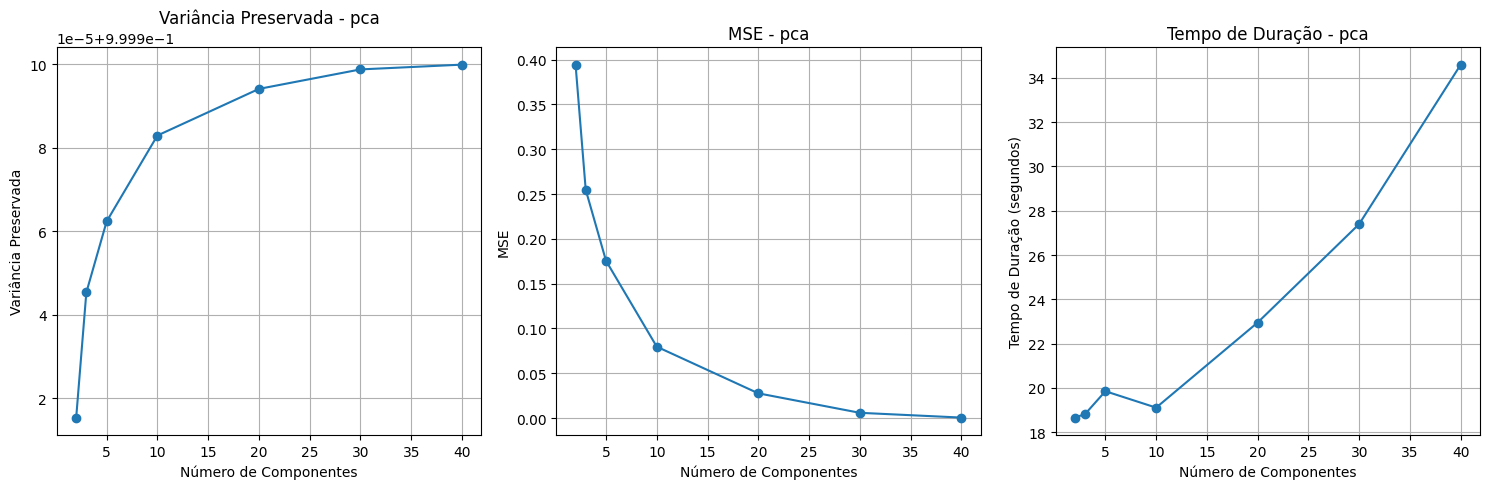

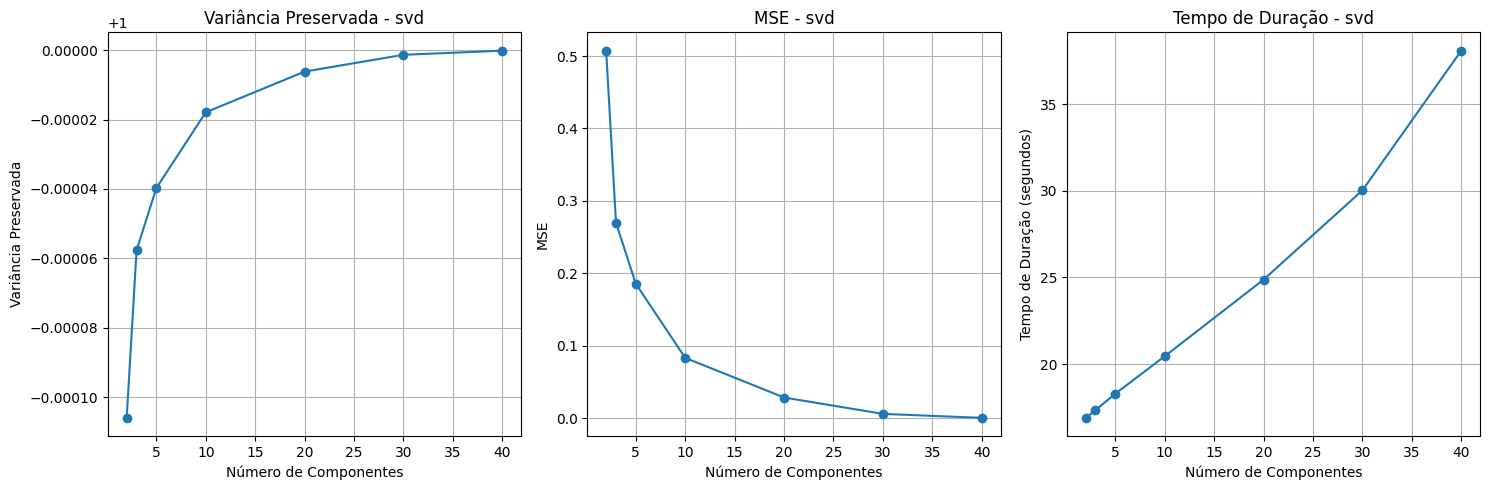

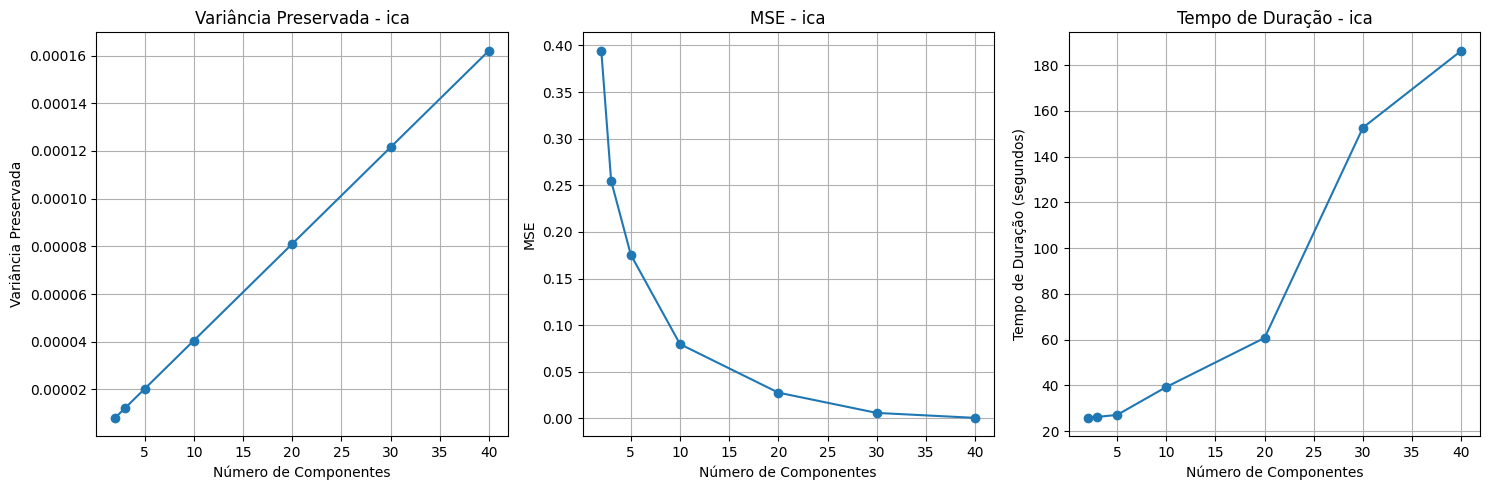

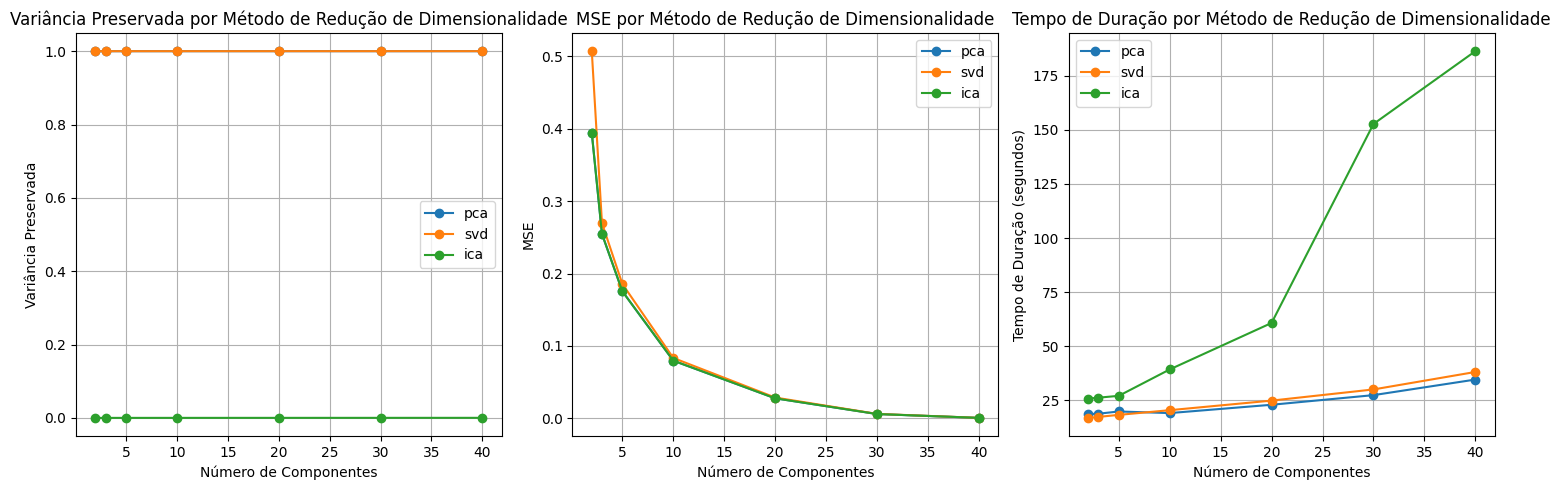

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

metodos = df_linear_results['Method'].unique()
n_componentes = df_linear_results['n_components']
variancia_preservada = df_linear_results['Preserved Variance Ratio']

mse = df_linear_results['MSE']
tempo_duracao = df_linear_results['time']

# Plotando gráficos de linhas individuais para cada método e métrica
for metodo in metodos:
    plt.figure(figsize=(15, 5))

    # Gráfico de Linhas para Variância Preservada
    plt.subplot(1, 3, 1)
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             variancia_preservada[df_linear_results['Method'] == metodo], 
             marker='o')
    plt.title(f'Variância Preservada - {metodo}')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Variância Preservada')
    plt.grid(True)

    # Gráfico de Linhas para MSE
    plt.subplot(1, 3, 2)
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             mse[df_linear_results['Method'] == metodo], 
             marker='o')
    plt.title(f'MSE - {metodo}')
    plt.xlabel('Número de Componentes')
    plt.ylabel('MSE')
    plt.grid(True)

    # Gráfico de Linhas para Tempo de Duração
    plt.subplot(1, 3, 3)
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             tempo_duracao[df_linear_results['Method'] == metodo], 
             marker='o')
    plt.title(f'Tempo de Duração - {metodo}')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Tempo de Duração (segundos)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plotando gráficos comparativos para cada métrica
plt.figure(figsize=(15, 5))

# Gráfico de Linhas para Variância Preservada
plt.subplot(1, 3, 1)
for metodo in metodos:
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             variancia_preservada[df_linear_results['Method'] == metodo], 
             marker='o', label=metodo)
plt.title('Variância Preservada por Método de Redução de Dimensionalidade')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Preservada')
plt.legend()
plt.grid(True)

# Gráfico de Linhas para MSE
plt.subplot(1, 3, 2)
for metodo in metodos:
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             mse[df_linear_results['Method'] == metodo], 
             marker='o', label=metodo)
plt.title('MSE por Método de Redução de Dimensionalidade')
plt.xlabel('Número de Componentes')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Gráfico de Linhas para Tempo de Duração
plt.subplot(1, 3, 3)
for metodo in metodos:
    plt.plot(n_componentes[df_linear_results['Method'] == metodo], 
             tempo_duracao[df_linear_results['Method'] == metodo], 
             marker='o', label=metodo)
plt.title('Tempo de Duração por Método de Redução de Dimensionalidade')
plt.xlabel('Número de Componentes')
plt.ylabel('Tempo de Duração (segundos)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Plot data after reduction

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dimensionality_reduction(df_reduced, y, method_name):
    
    # plt.figure(figsize=(8, 6))
    plt.scatter(df_reduced.iloc[:, 0], df_reduced.iloc[:, 1], c=y, alpha=0.5, label='Dados reduzidos')
    plt.title(f'Distribuição dos dados após redução de dimensionalidade ({method_name})')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')

    plt.legend()
    # plt.grid(True)
    plt.show()

In [36]:
path = "/home/cristiano/ufpr/results/"

In [37]:
data_pca = pd.read_parquet(f'{path}/X_train_transformed_dr_pca_2.parquet')
data_svd = pd.read_parquet(f'{path}/X_train_transformed_dr_svd_2.parquet')
data_ica = pd.read_parquet(f'{path}/X_train_transformed_dr_ica_2.parquet')

data_tsne = pd.read_parquet(f'{path}/X_train_transformed_dr_tsne_2.parquet')

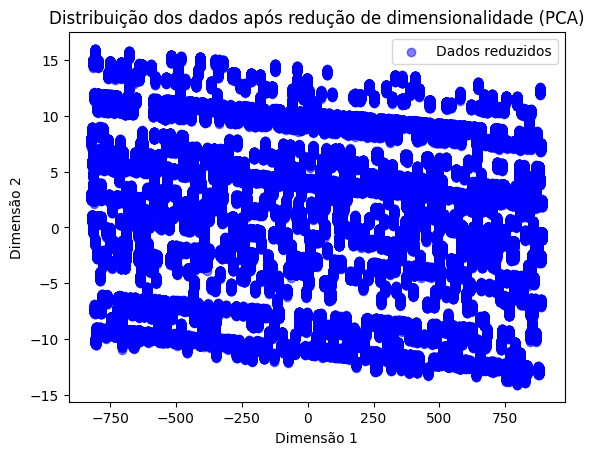

In [41]:
plot_dimensionality_reduction(data_pca, 'PCA')

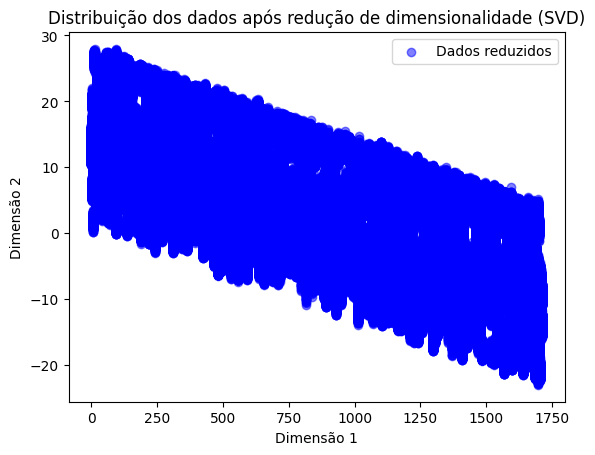

In [42]:
plot_dimensionality_reduction(data_svd, 'SVD')

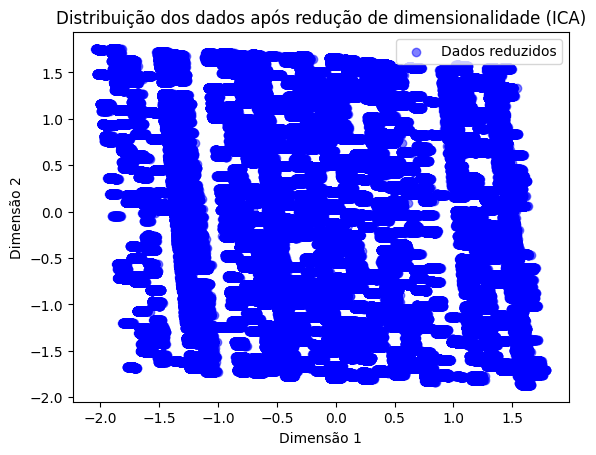

In [43]:
plot_dimensionality_reduction(data_ica, 'ICA')

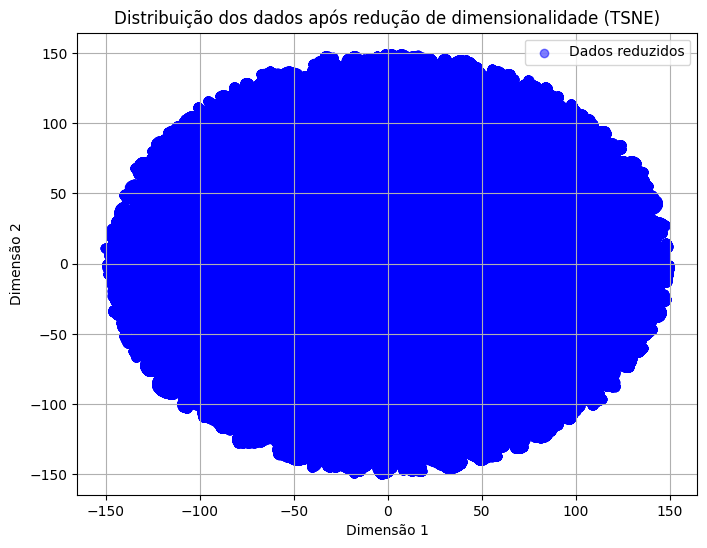

In [39]:
plot_dimensionality_reduction(data_tsne, 'TSNE')